In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
log_file = "/workspaces/Minerva-Discovery/my_experiments/sam_original/exec_experiments/results/experimento-parihaka_experiment_20241207_220459/experiment_log.csv"
df = pd.read_csv(log_file)
df.head()

,ratio,image_encoder_method,mask_decoder_method,val_loss_epoch,train_loss_epoch,test_loss_epoch,val_mIoU,train_mIoU,test_mIoU
0,0.01,fine_tuning,fine_tuning,tensor(1.7587),tensor(2.7811),1.657915,tensor(0.0775),tensor(0.0637),0.082176
1,0.01,fine_tuning,fine_tuning,tensor(1.4361),tensor(1.8824),1.477866,tensor(0.1565),tensor(0.1371),0.146423
2,0.01,fine_tuning,freeze,tensor(1.7264),tensor(2.3327),1.682047,tensor(0.1094),tensor(0.0619),0.108543
3,0.01,fine_tuning,freeze,tensor(1.6125),tensor(2.0312),1.537985,tensor(0.1198),tensor(0.0815),0.132976
4,0.01,fine_tuning,adapter,tensor(1.5801),tensor(2.9105),1.515506,tensor(0.1833),tensor(0.0873),0.177726


In [3]:
df['ratio'] = pd.to_numeric(df['ratio'], errors='coerce') * 100
df['val_loss_epoch'] = df['val_loss_epoch'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['train_loss_epoch'] = df['train_loss_epoch'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['test_loss_epoch'] = df['test_loss_epoch'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['val_mIoU'] = df['val_mIoU'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['train_mIoU'] = df['train_mIoU'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['test_mIoU'] = df['test_mIoU'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)

In [4]:
df.head()

,ratio,image_encoder_method,mask_decoder_method,val_loss_epoch,train_loss_epoch,test_loss_epoch,val_mIoU,train_mIoU,test_mIoU
0,1.0,fine_tuning,fine_tuning,1.7587,2.7811,1.657915,0.0775,0.0637,0.082176
1,1.0,fine_tuning,fine_tuning,1.4361,1.8824,1.477866,0.1565,0.1371,0.146423
2,1.0,fine_tuning,freeze,1.7264,2.3327,1.682047,0.1094,0.0619,0.108543
3,1.0,fine_tuning,freeze,1.6125,2.0312,1.537985,0.1198,0.0815,0.132976
4,1.0,fine_tuning,adapter,1.5801,2.9105,1.515506,0.1833,0.0873,0.177726


In [5]:
# Agrupamento com média e desvio padrão
grouped = df.groupby(['ratio', 'image_encoder_method', 'mask_decoder_method'], as_index=False).agg({
    'train_loss_epoch': ['mean', 'std'],
    'val_loss_epoch': ['mean', 'std'],
    'test_loss_epoch': ['mean', 'std'],
    'train_mIoU': ['mean', 'std'],
    'val_mIoU': ['mean', 'std'],
    'test_mIoU': ['mean', 'std'],
})

# Ajustando o DataFrame após o agrupamento
grouped.columns = ['ratio', 'image_encoder_method', 'mask_decoder_method',
                   'train_loss_mean', 'train_loss_std',
                   'val_loss_mean', 'val_loss_std',
                   'test_loss_mean', 'test_loss_std',
                   'train_mIoU_mean', 'train_mIoU_std',
                   'val_mIoU_mean', 'val_mIoU_std',
                   'test_mIoU_mean', 'test_mIoU_std',]

# Criando uma coluna que combina 'image_encoder_method' e 'mask_decoder_method'
grouped['method_combination'] = grouped['image_encoder_method'] + ' & ' + grouped['mask_decoder_method']

In [6]:
grouped

,ratio,image_encoder_method,mask_decoder_method,train_loss_mean,train_loss_std,val_loss_mean,val_loss_std,test_loss_mean,test_loss_std,train_mIoU_mean,train_mIoU_std,val_mIoU_mean,val_mIoU_std,test_mIoU_mean,test_mIoU_std,method_combination
0,1.0,adapter,adapter,2.40465,0.299177,2.39680,0.177625,2.443930,0.309227,0.04585,0.019021,0.05485,0.016900,0.056109,0.024685,adapter & adapter
1,1.0,adapter,fine_tuning,3.33000,1.404314,2.29575,0.849730,2.268359,0.755580,0.06260,0.021637,0.08550,0.028709,0.079954,0.012210,adapter & fine_tuning
2,1.0,adapter,freeze,3.06670,0.993344,3.14800,1.281702,3.406494,1.527880,0.04300,0.032810,0.04440,0.017819,0.042446,0.011810,adapter & freeze
3,1.0,fine_tuning,adapter,2.68000,0.325976,1.59310,0.018385,1.502518,0.018368,0.07055,0.023688,0.14165,0.058902,0.144981,0.046308,fine_tuning & adapter
4,1.0,fine_tuning,fine_tuning,2.33175,0.635477,1.59740,0.228113,1.567891,0.127314,0.10040,0.051902,0.11700,0.055861,0.114300,0.045429,fine_tuning & fine_tuning
5,1.0,fine_tuning,freeze,2.18195,0.213193,1.66945,0.080539,1.610016,0.101867,0.07170,0.013859,0.11460,0.007354,0.120759,0.017277,fine_tuning & freeze
6,1.0,freeze,adapter,3.38515,2.003587,3.01005,1.490510,2.859617,1.255574,0.04810,0.009475,0.05050,0.009051,0.049640,0.009928,freeze & adapter
7,1.0,freeze,fine_tuning,1.90170,0.091782,1.55325,0.018455,1.495879,0.049679,0.06895,0.013930,0.10640,0.028284,0.108323,0.022527,freeze & fine_tuning
8,5.0,adapter,adapter,4.41390,0.664539,3.87240,0.883883,3.803315,0.711074,0.02625,0.008132,0.03885,0.009970,0.034439,0.002322,adapter & adapter
9,5.0,adapter,fine_tuning,1.84040,0.424547,1.40600,0.086126,1.404432,0.026746,0.10465,0.009122,0.16355,0.023405,0.153491,0.024241,adapter & fine_tuning


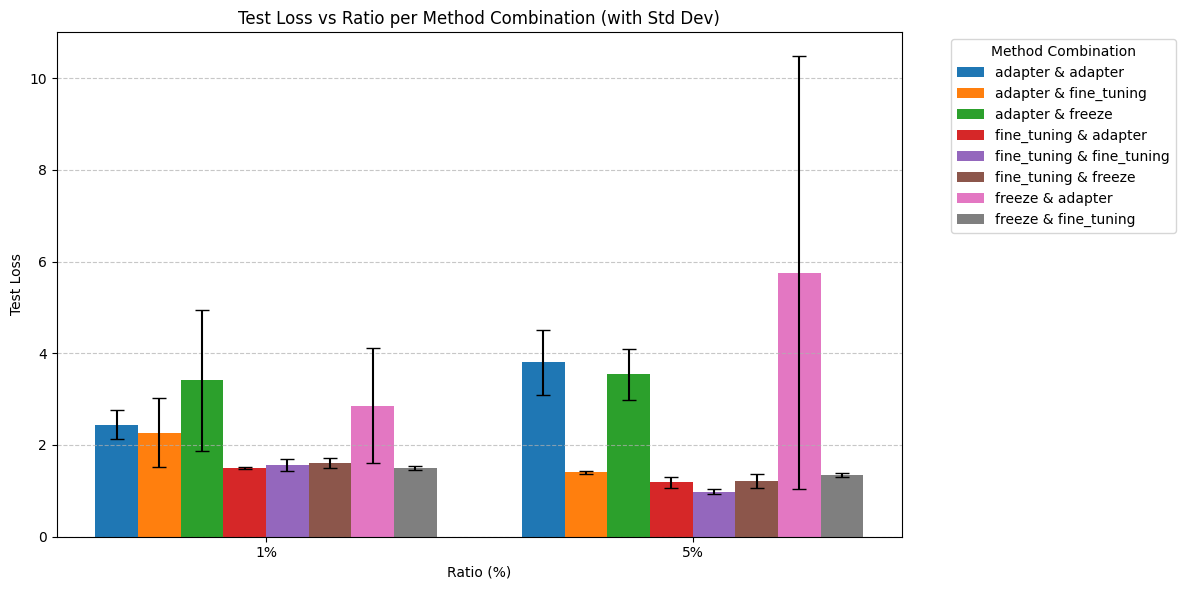

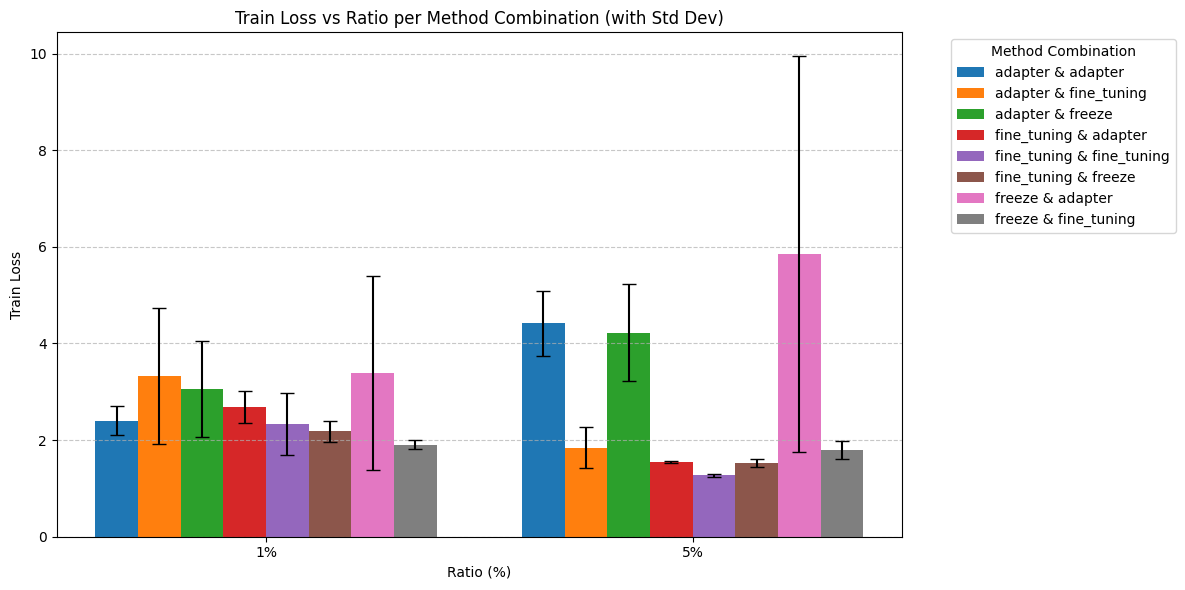

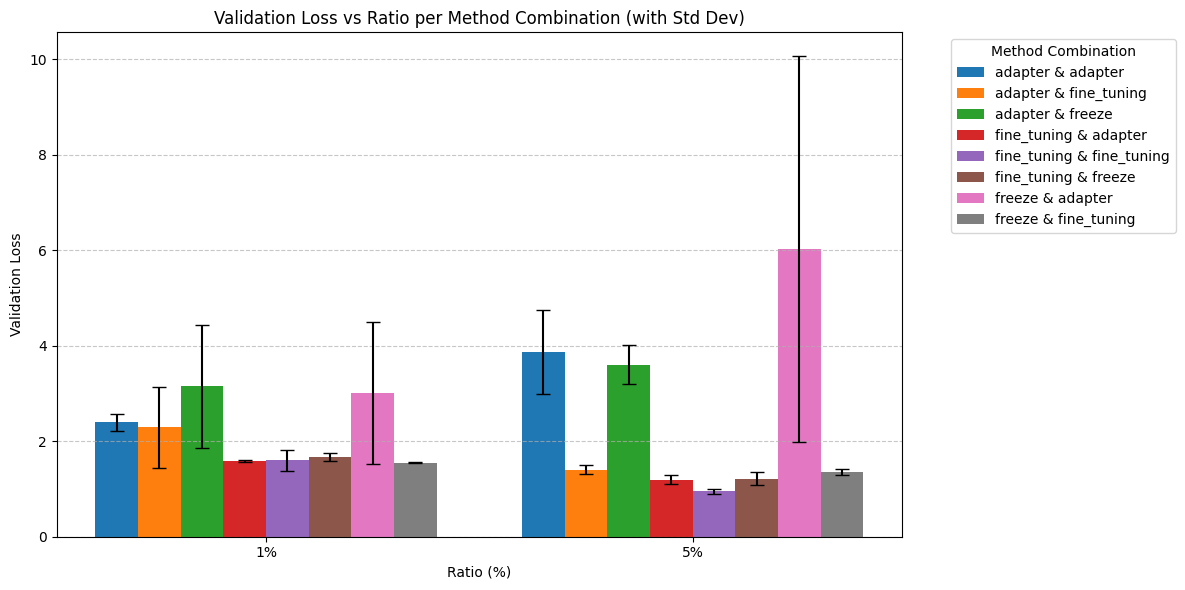

In [7]:
def plot_loss_with_std_matplotlib(data, loss_mean, loss_std, title, ylabel):
    plt.figure(figsize=(12, 6))

    # Preparando os dados
    ratios = sorted(data['ratio'].unique())  # Garantindo ordem dos ratios
    method_combinations = data['method_combination'].unique()

    bar_width = 0.15  # Largura das barras
    spacing = 0.3  # Espaçamento extra entre grupos
    x = np.arange(len(ratios)) * (len(method_combinations) * bar_width + spacing)  # Ajuste no espaçamento

    # Iterando sobre as combinações de métodos
    for i, method in enumerate(method_combinations):
        subset = data[data['method_combination'] == method]
        y_means = subset[loss_mean]
        y_stds = subset[loss_std]
        
        # Plotando as barras com erro
        plt.bar(x + i * bar_width, y_means, yerr=y_stds, capsize=5, width=bar_width, label=method)

    # Configurando os eixos e rótulos
    plt.xticks(x + (len(method_combinations) - 1) * bar_width / 2, [f"{int(r)}%" for r in ratios])
    plt.title(title)
    plt.xlabel('Ratio (%)')
    plt.ylabel(ylabel)
    plt.legend(title='Method Combination', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Gráfico de Test Loss com desvio padrão
plot_loss_with_std_matplotlib(grouped, 'test_loss_mean', 'test_loss_std',
                              'Test Loss vs Ratio per Method Combination (with Std Dev)', 'Test Loss')

# Gráfico de Train Loss com desvio padrão
plot_loss_with_std_matplotlib(grouped, 'train_loss_mean', 'train_loss_std',
                              'Train Loss vs Ratio per Method Combination (with Std Dev)', 'Train Loss')

# Gráfico de Validation Loss com desvio padrão
plot_loss_with_std_matplotlib(grouped, 'val_loss_mean', 'val_loss_std',
                              'Validation Loss vs Ratio per Method Combination (with Std Dev)', 'Validation Loss')

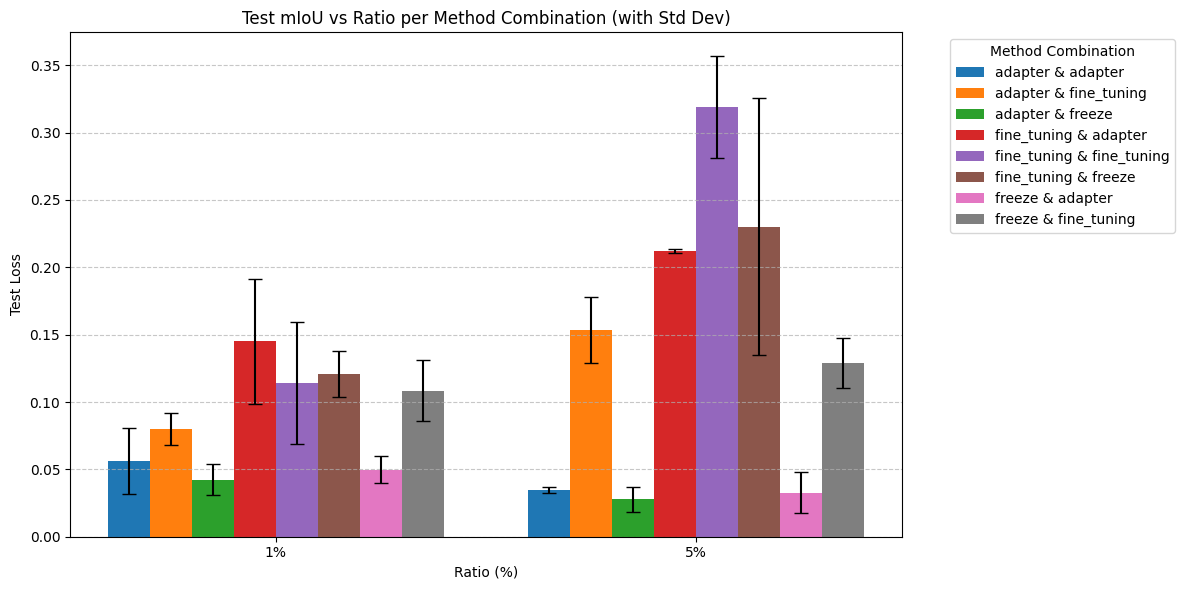

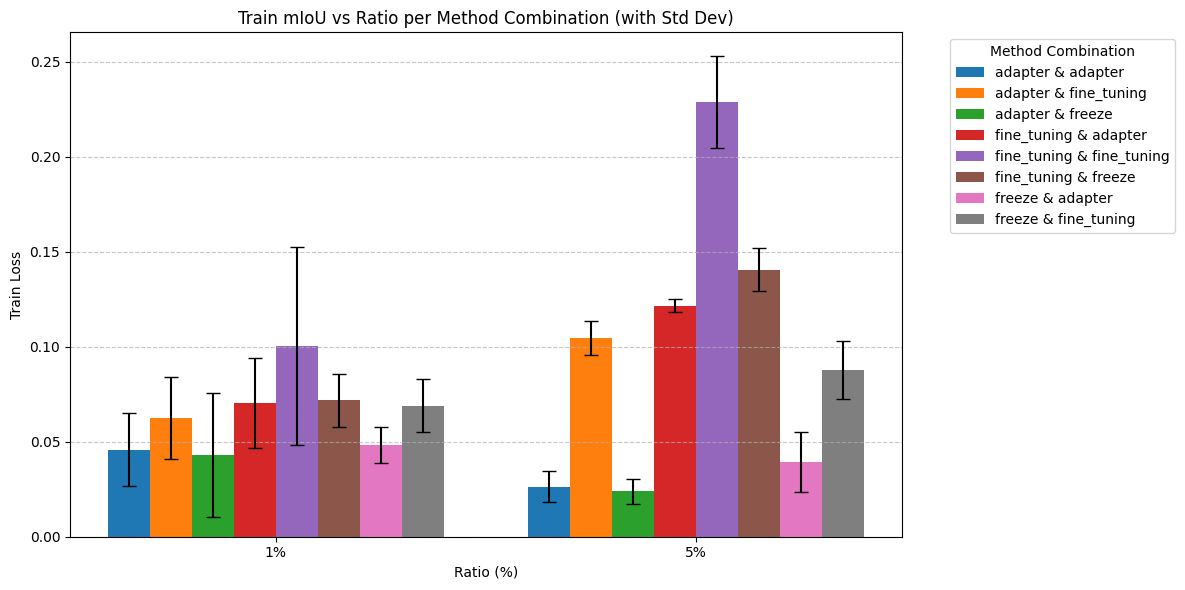

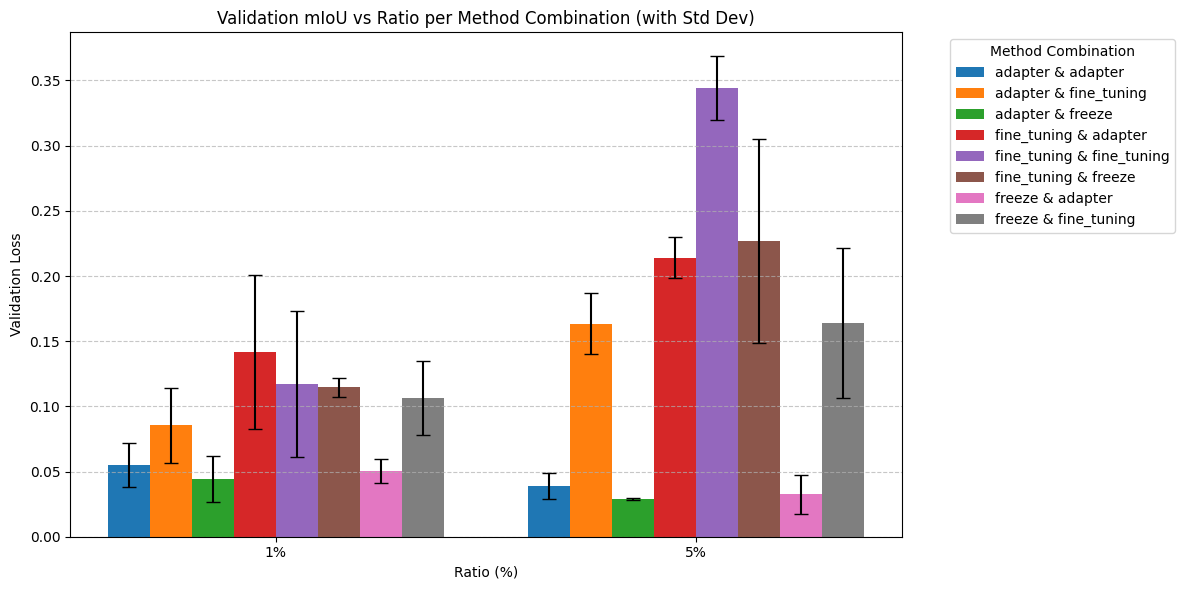

In [9]:
# Gráfico de Test Loss com desvio padrão
plot_loss_with_std_matplotlib(grouped, 'test_mIoU_mean', 'test_mIoU_std',
                              'Test mIoU vs Ratio per Method Combination (with Std Dev)', 'Test Loss')

# Gráfico de Train Loss com desvio padrão
plot_loss_with_std_matplotlib(grouped, 'train_mIoU_mean', 'train_mIoU_std',
                              'Train mIoU vs Ratio per Method Combination (with Std Dev)', 'Train Loss')

# Gráfico de Validation Loss com desvio padrão
plot_loss_with_std_matplotlib(grouped, 'val_mIoU_mean', 'val_mIoU_std',
                              'Validation mIoU vs Ratio per Method Combination (with Std Dev)', 'Validation Loss')